In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

In [7]:
# Load datasets
train_data = pd.read_csv("kdd99_training_data.csv")
test_data = pd.read_csv("kdd99_testing_data.csv")
train_labels = pd.read_csv("kdd99_training_labels.csv")
test_labels = pd.read_csv("kdd99_testing_labels.csv")

In [8]:
# Convert label columns to string type
train_labels['label'] = train_labels['label'].astype(str)
test_labels['label'] = test_labels['label'].astype(str)

In [9]:
# Convert the entire training dataset to string type (you might want to adjust this based on your data)
train_data = train_data.astype(str)
# Print shapes and unique labels
print("Shape of train_data:", train_data.shape)
print("Shape of test_data:", test_data.shape)
print("Unique labels in train_labels:", train_labels['label'].unique())

Shape of train_data: (370515, 31)
Shape of test_data: (123505, 31)
Unique labels in train_labels: ['normal' 'dos' 'r2l' 'probe' 'u2r']


In [10]:
# Normalizing the data
data_scaler = StandardScaler()
# Fit and transform the training data
X_train_scaled = data_scaler.fit_transform(train_data)
# Transform the test data using the same scaler
X_test_scaled = data_scaler.transform(test_data)

In [13]:
# Training the data using KNN
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train_scaled, train_labels['label'])  # Change y_train to train_labels['label']
predictions = knn_classifier.predict(X_test_scaled)

In [14]:
# Print results for k=1
# Build confusion matrix and print classification report
confusion_matrix_result = confusion_matrix(test_labels['label'], predictions)  # Change y_test to test_labels['label']
print(classification_report(test_labels['label'], predictions))

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     97676
      normal       1.00      1.00      1.00     24482
       probe       0.99      0.98      0.99      1056
         r2l       0.96      0.98      0.97       279
         u2r       0.64      0.58      0.61        12

    accuracy                           1.00    123505
   macro avg       0.92      0.91      0.91    123505
weighted avg       1.00      1.00      1.00    123505



In [15]:
# Build annotations
class_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']
annotation_labels = []
for i in range(5):
    for j in range(5):
        annotation_labels.append(str(f"Real {class_labels[i]}\nPredicted {class_labels[j]}\n{confusion_matrix_result[i, j]}"))
annotation_labels = np.asarray(annotation_labels).reshape(5, 5)

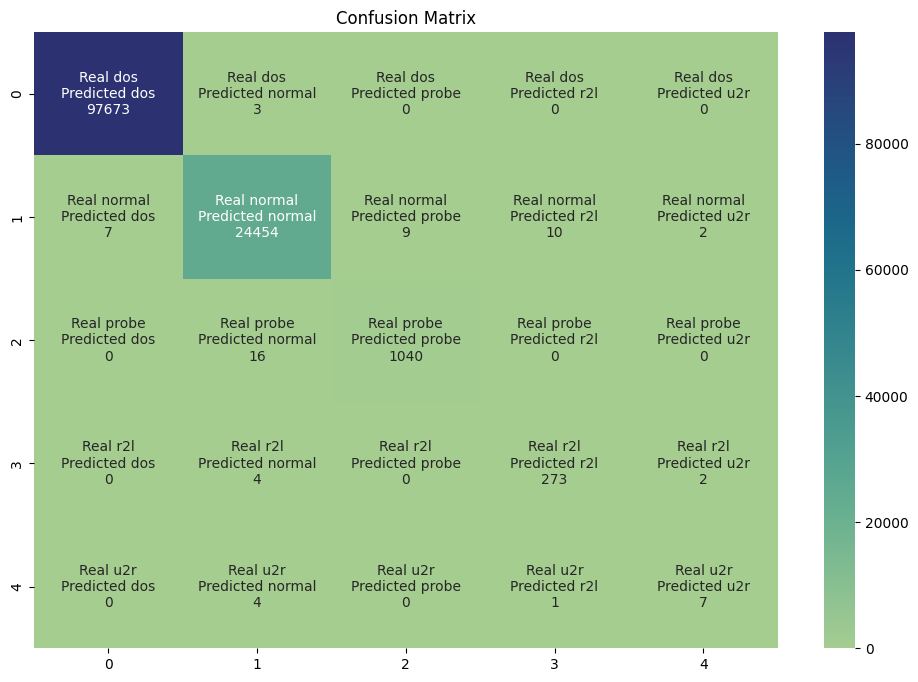

In [16]:
# Confusion matrix visualization
plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix_result, annot=annotation_labels, cmap='crest', fmt='')
plt.show()

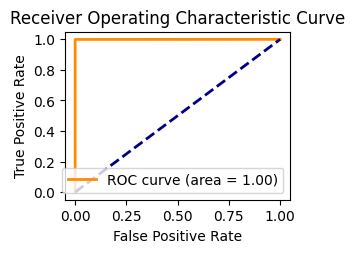

In [33]:
# Convert labels to binary format
binary_test_labels = label_binarize(test_labels['label'], classes=['dos', 'normal', 'probe', 'r2l', 'u2r'])
binary_predictions = label_binarize(predictions, classes=['dos', 'normal', 'probe', 'r2l', 'u2r'])

# ROC Curve
fpr, tpr, _ = roc_curve(binary_test_labels.ravel(), binary_predictions.ravel())
roc_auc = auc(fpr, tpr)

# Display ROC Curve
plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')

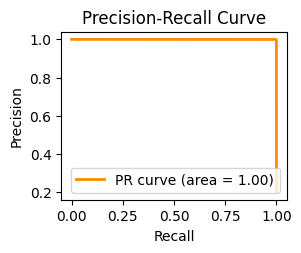

In [36]:
# Convert labels to binary format
binary_test_labels = label_binarize(test_labels['label'], classes=['dos', 'normal', 'probe', 'r2l', 'u2r'])
binary_predictions = label_binarize(predictions, classes=['dos', 'normal', 'probe', 'r2l', 'u2r'])

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(binary_test_labels.ravel(), binary_predictions.ravel())
pr_auc = auc(recall, precision)

# Display Precision-Recall Curve
plt.subplot(2, 2, 3)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')

In [37]:
# Additional Evaluation Metrics
accuracy = accuracy_score(test_labels['label'], predictions)
precision = precision_score(test_labels['label'], predictions, average='weighted')
recall = recall_score(test_labels['label'], predictions, average='weighted')
f1 = f1_score(test_labels['label'], predictions, average='weighted')
mcc = matthews_corrcoef(test_labels['label'], predictions)

In [38]:
# Display results
print(f"\nResults for K-Nearest Neighbors:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")


Results for K-Nearest Neighbors:
Accuracy: 0.999530383385288
Precision: 0.999528514247723
Recall: 0.999530383385288
F1 Score: 0.9995290701535438
Matthews Correlation Coefficient: 0.9985987315946491
